In [15]:
import cv2 
import numpy as np
import dlib
import matplotlib.pyplot as plt 

def imshow(title ="image",image = None, size= 10 ):
    w, h =image.shape[0],image.shape[1]
    aspect_ratio =  w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.show()

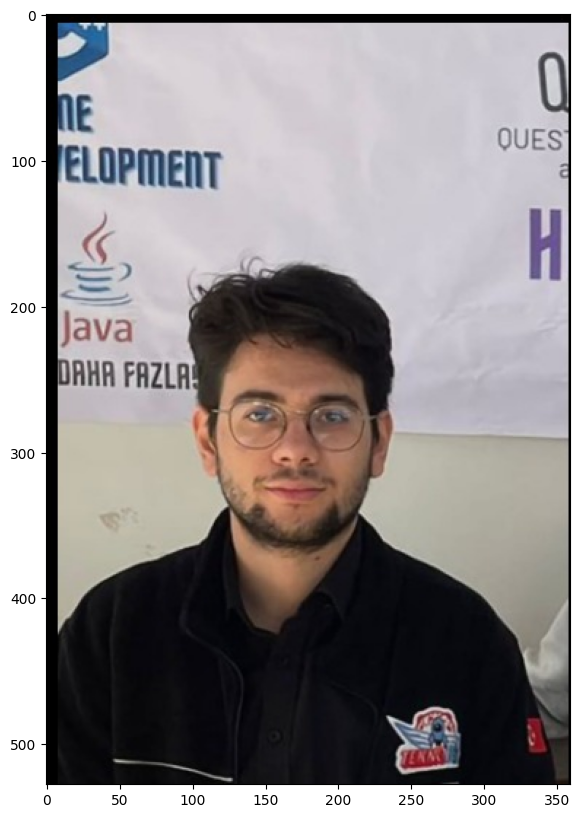

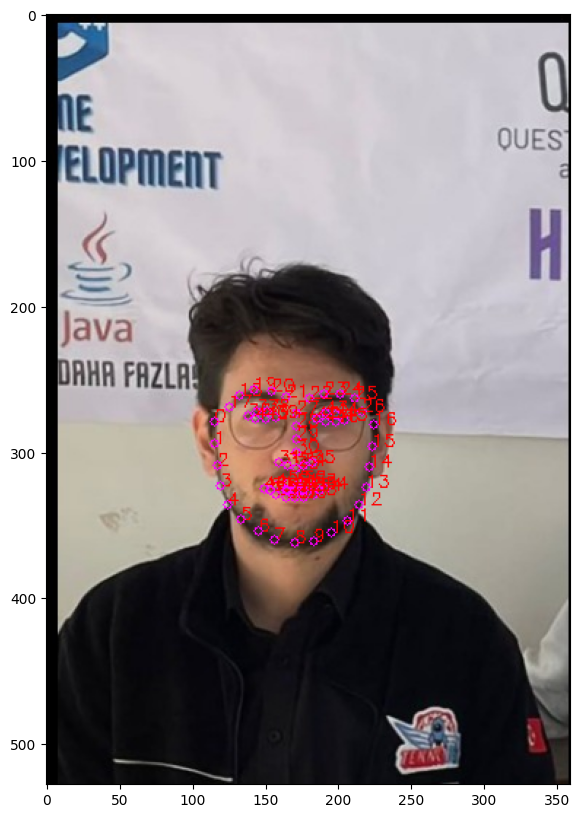

In [16]:
PREDICTOR_PATH =r'C:\Users\cengh\Desktop\ComputerVison\FacialLandMarkdDetection\shape_predictor_68_face_landmarks.dat' 
predictor = dlib.shape_predictor(PREDICTOR_PATH)
detector = dlib.get_frontal_face_detector()
class TooManyFaces(Exception):
    pass
class NoFaces(Exception):
    pass

def get_landmarks(im):
    rects = detector(im,1)

    if len(rects)>1:
        raise TooManyFaces
    if len(rects)==0:
        raise NoFaces
    return np.matrix([[p.x,p.y]for p in predictor(im,rects[0]).parts()])

def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(im, str(idx), pos, fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.4, color=(0, 0, 255))
        cv2.circle(im, pos, 3, color=(255, 0, 255))
    return im
image = cv2.imread(r'C:\Users\cengh\Desktop\ComputerVison\HaarCascade\CengizhanBayram.jpeg')
imshow('original image',image)
landmarks = get_landmarks(image)
image_with_landmarks = annotate_landmarks(image , landmarks)
imshow('result ',image_with_landmarks)
